## Astoria  conquest

I've been living in Astoria for the past 2 years. I usually run around the roosvelt Island that's not far away from my house. One day I was exploring the area and I found out that there are a lot of good places to know in here. So, that's why I decided to run all astoria 10 miles at the time.

This project is simple but not easy: I want to run all the street of astoria, starting from my house and finishing at the gym since I like to do sauna after running.

First, we needed to know what are the boundaries of this challenge for that we went to the NYC database and collect the data from the neighborhood tabulation, NTAS LINK (https://data.cityofnewyork.us/City-Government/2020-Neighborhood-Tabulation-Areas-NTAs-/9nt8-h7nd/about_data)

second,  of all, we will use Strava to record all my runs, so every time I run this one will be uploaded to the file that way I will see how many miles I have left to run

Challenges:
The main challenge is the optimization of this project since I want to run at least 8 miles each time, but also I want to do it in the list runs as possible therefore a have a optimization of routes. 

So in real time requires the API from Strava and also I want to connect with my wo whoop data that way we have un holistic view of what happened in my runnings since I want to know what are the main factors for me to have a good run meaning a good pace and a stable pace.



## 1. Data loading and first exploration

In [1]:
import requests
import pandas as pd

API_URL = "https://data.cityofnewyork.us/resource/9nt8-h7nd.json"

params = {
 "$where": "upper(ntaname) like '%ASTORIA%'"
}

response = requests.get(API_URL, params=params)
response.raise_for_status()
data = pd.DataFrame(response.json())

print(data[["boroname","ntaname"]])

print("Libraries imported successfully.")

  boroname                           ntaname
0   Queens  Astoria (North)-Ditmars-Steinway
1   Queens         Old Astoria-Hallets Point
2   Queens                 Astoria (Central)
3   Queens   Astoria (East)-Woodside (North)
4   Queens                      Astoria Park
Libraries imported successfully.


In [2]:
import pandas as pd

# Assuming `response.json()` contains the JSON data
data = response.json()

# Print the first few records to inspect the structure
print("Sample JSON Data:", data[:2])

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame info to verify its structure
print("DataFrame Info:")
print(df.info())

# Display the first few rows of the DataFrame
print("DataFrame Head:")
print(df.head())

Sample JSON Data: [{'borocode': '4', 'boroname': 'Queens', 'countyfips': '081', 'nta2020': 'QN0101', 'ntaname': 'Astoria (North)-Ditmars-Steinway', 'ntaabbrev': 'Astr_N', 'ntatype': '0', 'cdta2020': 'QN01', 'cdtaname': 'QN01 Astoria-Queensbridge (CD 1 Equivalent)', 'shape_leng': '45685.6397461', 'shape_area': '58301781.0542', 'the_geom': {'type': 'MultiPolygon', 'coordinates': [[[[-73.88945486837545, 40.77353295162915], [-73.88943432165382, 40.77326539109006], [-73.88941280789925, 40.772985242231954], [-73.8894022625021, 40.772926718073755], [-73.88904000254537, 40.77091623848157], [-73.88870893210384, 40.769091523748884], [-73.88868841302896, 40.76897759712405], [-73.88874444049091, 40.76891817925372], [-73.88870027157579, 40.768909796491975], [-73.88863437720524, 40.76889680669804], [-73.88860184082482, 40.76888941600497], [-73.8885029223487, 40.768852807577446], [-73.88841083634009, 40.76880263676428], [-73.88833024243536, 40.768740276113306], [-73.88826504513776, 40.76866826058187]

In [3]:
# Extract the 'type' and 'coordinates' fields from the 'the_geom' column
df['geometry_type'] = df['the_geom'].apply(lambda x: x['type'] if isinstance(x, dict) else None)
df['geometry_coordinates'] = df['the_geom'].apply(lambda x: x['coordinates'] if isinstance(x, dict) else None)

# Validate the extracted data
print("Geometry Type Column:")
print(df['geometry_type'].head())

print("\nGeometry Coordinates Column:")
print(df['geometry_coordinates'].head())

Geometry Type Column:
0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
3    MultiPolygon
4    MultiPolygon
Name: geometry_type, dtype: object

Geometry Coordinates Column:
0    [[[[-73.88945486837545, 40.77353295162915], [-...
1    [[[[-73.92827730832717, 40.77689897532444], [-...
2    [[[[-73.9119402607033, 40.7690101531208], [-73...
3    [[[[-73.9020251656558, 40.76741678384724], [-7...
4    [[[[-73.92398142938171, 40.77461511268893], [-...
Name: geometry_coordinates, dtype: object


   • Total rows: 5
   • Checking geometry column...
   • Rows with null geometry: 0
🔄 Parsing GeoJSON-like geometries...
✅ Successfully parsed 5 geometries
🔄 Filtering for Astoria neighborhoods...
✅ Found 5 Astoria neighborhoods


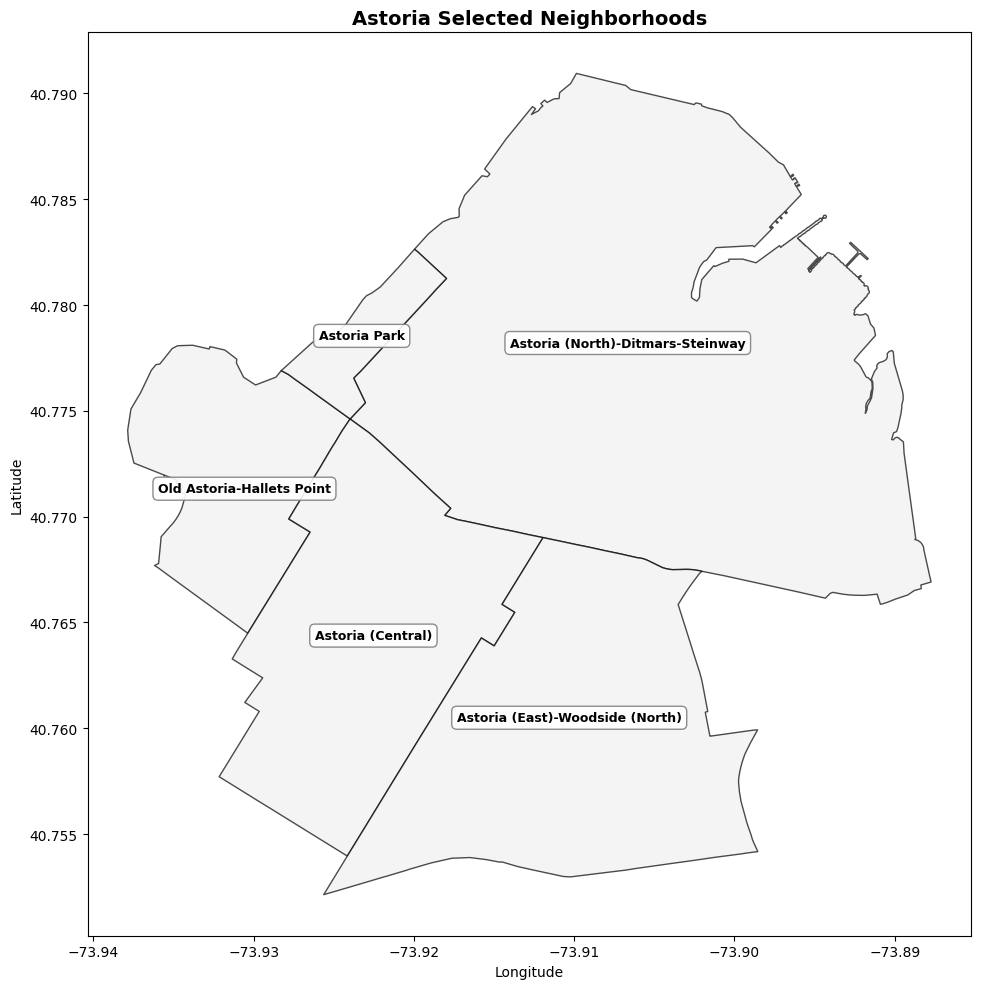

📊 Summary:
   • Neighborhoods included: ['Astoria (North)-Ditmars-Steinway', 'Old Astoria-Hallets Point', 'Astoria (Central)', 'Astoria (East)-Woodside (North)', 'Astoria Park']
   • Total area covered: 0.001181 square degrees
   • Total area covered: 0.001181 square degrees


/var/folders/l6/7c34hv4d1qxf6512mr1v27cc0000gn/T/ipykernel_74871/3448079511.py:111: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(f"   • Total area covered: {gdf_astoria.geometry.area.sum():.6f} square degrees")


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import shape

# Assume 'df' is your DataFrame that is already loaded with your data.
# The script will now use your actual data instead of the sample.

# --- Geometry Processing ---

# Check for any issues with the geometry column
print(f"   • Total rows: {len(df)}")
print(f"   • Checking geometry column...")

# Check for null geometry values
invalid_geom = df['the_geom'].isnull()
print(f"   • Rows with null geometry: {invalid_geom.sum()}")

if invalid_geom.sum() > 0:
    print("   • Removing rows with null geometry...")
    df = df[~invalid_geom].copy()
    print(f"   • Remaining rows: {len(df)}")

# Safely parse GeoJSON-like geometry with error handling
def parse_geojson_geom(geom_dict):
    """Safely load GeoJSON-like dictionary geometry using shape()"""
    try:
        # Check if the input is a dictionary with 'type' and 'coordinates'
        if isinstance(geom_dict, dict) and 'type' in geom_dict and 'coordinates' in geom_dict:
            return shape(geom_dict)
        return None
    except Exception as e:
        print(f"   • Warning: Failed to parse geometry: {str(e)[:100]}...")
        return None

print("🔄 Parsing GeoJSON-like geometries...")
# Apply the safe parsing function
geometry_series = df['the_geom'].apply(parse_geojson_geom)

# Remove any rows where geometry parsing failed
valid_geom = geometry_series.notna()
if not valid_geom.all():
    failed_count = (~valid_geom).sum()
    print(f"   • Removing {failed_count} rows with failed geometry parsing...")
    df = df[valid_geom].copy()
    geometry_series = geometry_series[valid_geom]

print(f"✅ Successfully parsed {len(geometry_series)} geometries")

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry_series, crs="EPSG:4326")


# --- Filtering and Plotting ---

# Filter for Astoria neighborhoods
keep_names = {
    "Astoria (Central)",
    "Old Astoria-Hallets Point",
    'Astoria (East)-Woodside (North)',
    'Queensbridge-Ravenswood-Dutch Kills',
    'Astoria (North)-Ditmars-Steinway',
    'Astoria Park'
}

# Normalize names for robust matching
keep_names_normalized = {name.lower().strip() for name in keep_names}
gdf['ntaname_normalized'] = gdf['ntaname'].str.lower().str.strip()

print(f"🔄 Filtering for Astoria neighborhoods...")
gdf_astoria = gdf[gdf["ntaname_normalized"].isin(keep_names_normalized)].copy()
print(f"✅ Found {len(gdf_astoria)} Astoria neighborhoods")

if len(gdf_astoria) == 0:
    print("❌ No matching neighborhoods found! Check neighborhood names.")
    print("Available names:")
    # Ensure ntaname column exists before trying to access it
    if 'ntaname' in gdf.columns:
        for name in sorted(gdf['ntaname'].unique()):
            print(f"   • {name}")
else:
    # Plot the neighborhoods
    fig, ax = plt.subplots(figsize=(12, 10))
    gdf_astoria.plot(ax=ax, edgecolor='black', facecolor='#f0f0f0', alpha=0.7)

    # Add labels to the plot
    for _, row in gdf_astoria.iterrows():
        # representative_point ensures the label is inside the polygon
        p = row.geometry.representative_point()
        ax.annotate(
            row["ntaname"],
            xy=(p.x, p.y),
            ha="center", va="center",
            fontsize=9, fontweight='bold',
            bbox=dict(
                boxstyle="round,pad=0.4",
                facecolor="white",
                alpha=0.9,
                edgecolor="gray"
            )
        )

    ax.set_title("Astoria Selected Neighborhoods", fontsize=14, fontweight='bold')
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.tight_layout()
    plt.show()

    print(f"📊 Summary:")
    print(f"   • Neighborhoods included: {list(gdf_astoria['ntaname'])}")
    print(f"   • Total area covered: {gdf_astoria.geometry.area.sum():.6f} square degrees")

In [ ]:
## add image of the astoria 

From the NYC NTA dataset, Astoria isn’t a single polygon — it’s split into multiple zones. To match the “real-life” idea of Astoria from the left map, you’d want to include these zones:

⸻

✅ Zones to include for Astoria
	•	Astoria (Central)
	•	Astoria (North)–Ditmars–Steinway
	•	Old Astoria–Hallets Point
	•	Astoria Park
	•	Astoria (East)–Woodside (North)
	•	Queensbridge–Ravenswood–Dutch Kills (southern border often counted as part of Astoria)

⸻

⚠️ Zones to exclude
	•	Sunnyside Yards (North) → belongs to Sunnyside/Woodside, not Astoria.
	•	St. Michael’s Cemetery → technically a separate land-use zone, not part of Astoria proper.

## 2. Planning for the optimized routes four this challenge

We want the best routes possible to compleate the challenges with the least amount of races. 

This mathematical problem is called Multi-constrained Geographic Arc Routing Problem (MC-GARP).

Objective: minimize the through number of runs needed to Traverse every single street in Astoria.

### constraints:
* **Geographic Boundary Contraints**: All routes segments must remain within defined Astoria polygons.
* **Distance Constraint**: each must be between 6 to 12 miles
* **Coverage requirements**: each Street should be run at least once.
* **Connectivity constraints**:  route can only use actual street intersections as waypoint

Why This Is Computationally Challenging:

Exponential solution space: With ~1000 intersections in Astoria, possible routes grow exponentially
Geometric validation required: Each route segment needs polygon containment checking
Multi-objective optimization: Balancing coverage, distance, and boundary compliance
Irregular geography: Astoria's shape doesn't partition evenly into 6-12 mile zones


## Solution:
## Phase 1: Graph Construction & Modeling 🗺️

First, we'll transform the real-world map of Astoria into a digital graph. Using OpenStreetMap data, we will model all street intersections as nodes and the streets connecting them as weighted edges, ensuring every segment is contained within Astoria's geographic boundary. This creates the digital playground where we can solve the problem.

## Phase 2: Initial Solution - The Greedy Heuristic ➡️

Next, we'll generate a complete "first draft" of the running plan. A fast greedy algorithm will quickly create a set of runs that satisfies all constraints (6-12 miles, home-to-gym, full coverage). This provides a valid, but suboptimal, solution that serves as the starting point for true optimization.

## Phase 3: Core Optimizer - Adaptive Large Neighborhood Search (ALNS)

This is the core of the project. The ALNS metaheuristic will intelligently refine the initial solution to achieve the minimum number of runs. It works in a powerful "destroy and repair" cycle:

Destroy: It strategically breaks apart the current plan, removing a few routes or street segments.

Repair: It then rebuilds the solution using smart heuristics to re-insert the removed segments in more efficient ways.

Decide: It keeps the improved plans and uses advanced logic to avoid getting stuck, ensuring it finds a globally optimal solution.

This iterative process systematically consolidates runs, reduces redundancy, and finds the most efficient way to cover every street in Astoria.

In [ ]:
%pip install osmnx networkx folium shapely geopandas pandas osmnx sklearn

## Phase 1: Graph Construction & Modeling

The osmx database ( https://www.openstreetmap.org/) has all the geolocations we needed inside our interest zone, but they have multiple stret types, as we can see in the follwoing table, "footway" is the one that was interesting. But after further examination we decidded to ommit it since each street due to its double direction would be counted double, which make it more difficult to get a proper model running.  our street types are:
* Residentilal
* Tertiary
* Secondary
* Unclassified
* Living_street



In [ ]:
import osmnx as ox
dir(ox)[:20]  # first 20 functions/objects

In [21]:
import osmnx as ox
import pandas as pd
from shapely.ops import unary_union
        
astoria_boundary = unary_union(gdf_astoria.geometry.values)
    
# Create the graph
G = ox.graph_from_polygon(
    astoria_boundary, 
    network_type='walk',
    retain_all=True,
    truncate_by_edge=True
)
print(f"✅ Graph created with {len(G.nodes())} nodes and {len(G.edges())} edges")

# Now create the street types table
edges_gdf = ox.graph_to_gdfs(G, nodes=False)
highway_counts = edges_gdf['highway'].value_counts()

# Create a simple table
street_table = pd.DataFrame({
    'Street Type': highway_counts.index,
    'Count': highway_counts.values,
    'Percentage': (highway_counts.values / len(edges_gdf) * 100).round(1)
})

print("🛣️ Astoria Street Types Summary")
print(street_table.to_string(index=False))

✅ Graph created with 6511 nodes and 21332 edges
🛣️ Astoria Street Types Summary
             Street Type  Count  Percentage
                 footway  13806        64.7
             residential   3306        15.5
                 service   2488        11.7
                tertiary    988         4.6
               secondary    466         2.2
                 primary    160         0.8
        [footway, steps]     36         0.2
              pedestrian     20         0.1
          secondary_link     14         0.1
[residential, secondary]     10         0.0
                   steps      6         0.0
  [residential, service]      6         0.0
 [tertiary, residential]      4         0.0
            primary_link      4         0.0
   [tertiary, secondary]      4         0.0
                    path      2         0.0
   [pedestrian, footway]      2         0.0
    [secondary, primary]      2         0.0
  [residential, footway]      2         0.0
           tertiary_link      2         

In [6]:
import osmnx as ox
import networkx as nx
import folium
from shapely.geometry import Point, LineString
from shapely.ops import unary_union
import geopandas as gpd
from shapely import wkt
import pandas as pd

home = (40.75510483324099, -73.92654648393645) #this is where each run would start
gym = (40.761797676448346, -73.92493774996306) #this is where each run would end

# Add edge lengths in meters, then convert to miles for your distance constraints
G = ox.add_edge_speeds(G)  # Adds travel speeds
G = ox.add_edge_travel_times(G)  # Adds travel times  

# Calculate length in miles for each edge (street segment)
for u, v, key, data in G.edges(keys=True, data=True):
    if 'length' in data:
        # Convert meters to miles (1 meter = 0.000621371 miles)
        data['length_miles'] = data['length'] * 0.000621371
    else:
        # Fallback: calculate from node coordinates if length missing
        node1 = G.nodes[u]
        node2 = G.nodes[v]
        point1 = Point(node1['x'], node1['y'])
        point2 = Point(node2['x'], node2['y'])
        # Use approximate distance calculation
        distance_meters = point1.distance(point2) * 111000  # Rough lat/lon to meters
        data['length_miles'] = distance_meters * 0.000621371

print(f"✅ Added distance weights to all street segments")

# Step 4: Add home and gym as special nodes
# We need to connect your start/end points to the street network
print("🔄 Step 4: Adding home and gym locations to network...")


✅ Added distance weights to all street segments
🔄 Step 4: Adding home and gym locations to network...



📊 Initial graph contains 2184 edges
🔄 Removing all dead-end streets using corrected logic...
   - Removed 41 dead-end nodes in this iteration...
   - Removed 2 dead-end nodes in this iteration...
   - Removed 1 dead-end nodes in this iteration...
   - No more dead-ends found.
🎨 Visualizing the final, ultra-clean network...


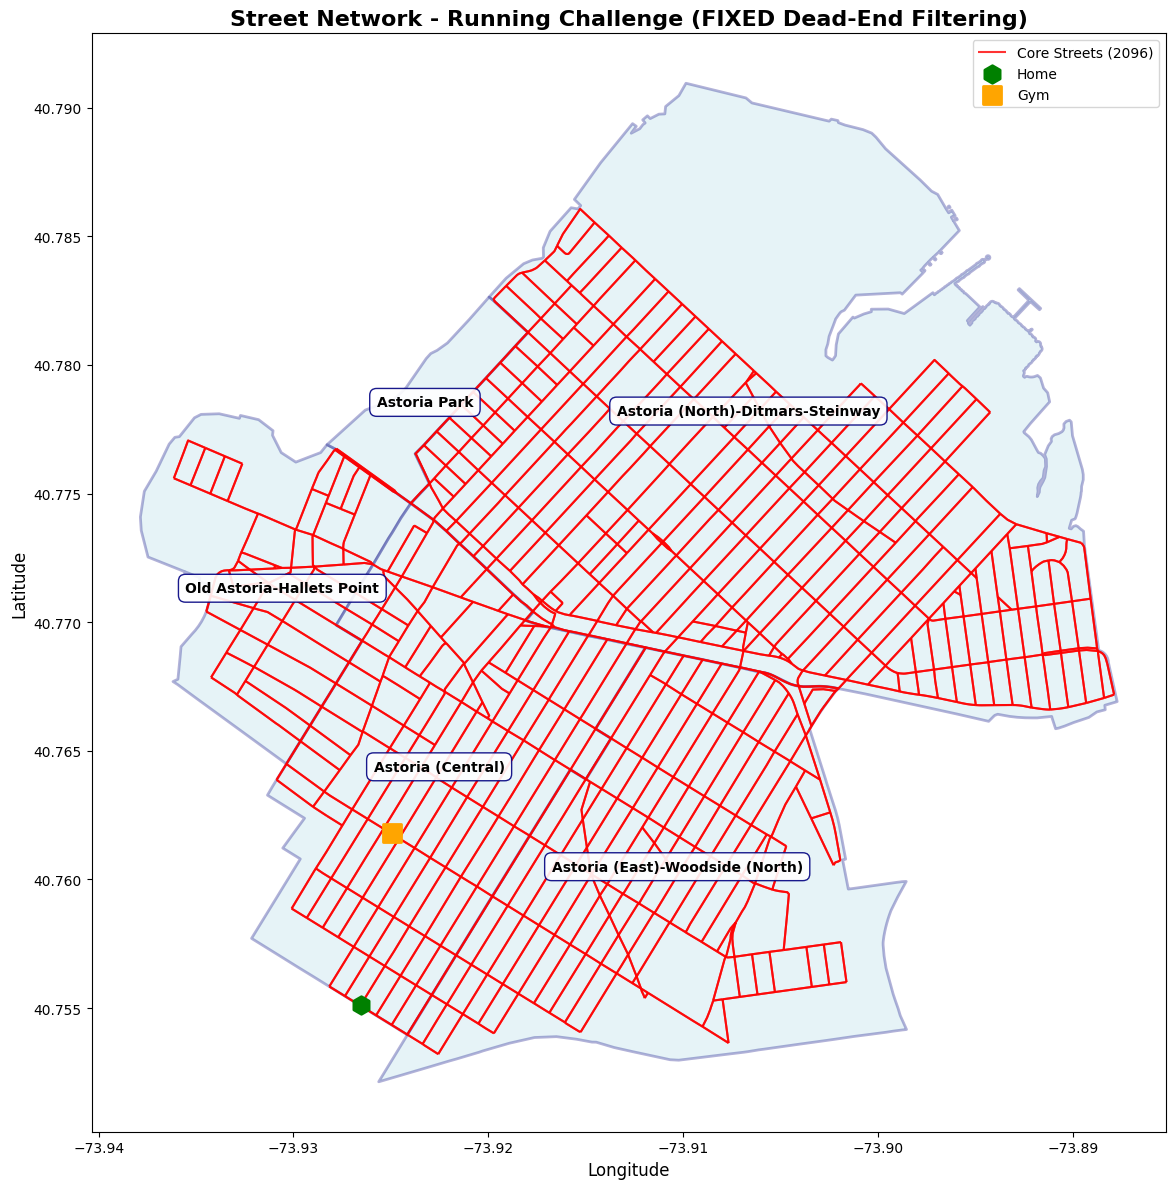


📊 Network Analysis (After Corrected Removal):
   • TOTAL NETWORK: 2096 segments,  171.6 miles
   • Edge reduction: 4.0%
   • Remaining dead-ends: 0 nodes


In [26]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

def remove_all_dead_ends(graph):
    """
    Iteratively finds and removes ALL true dead-end nodes from a directed graph
    until no more dead-ends are found.
    """
    print("🔄 Removing all dead-end streets using corrected logic...")
    G_pruned = graph.copy()
    
    while True:
        # --- CORRECTED LOGIC ---
        # A true dead-end has only one unique neighbor (considering both in and out edges)
        dead_ends = [
            node for node in G_pruned.nodes()
            if len(set(G_pruned.successors(node)) | set(G_pruned.predecessors(node))) == 1
        ]
        # --- END CORRECTION ---

        if not dead_ends:
            print("   - No more dead-ends found.")
            break
            
        G_pruned.remove_nodes_from(dead_ends)
        print(f"   - Removed {len(dead_ends)} dead-end nodes in this iteration...")

    # Ensure the final graph is the largest connected component
    if G_pruned.number_of_nodes() > 0:
        largest_component = max(nx.weakly_connected_components(G_pruned), key=len)
        G_final = G_pruned.subgraph(largest_component).copy()
    else:
        G_final = G_pruned

    return G_final


street_types_to_keep = [
    'residential',
    'tertiary',
    'secondary',
    'unclassified',
    'living_street'
]

# Step 1: Create the initial graph
G_initial = ox.graph_from_polygon(
    astoria_boundary,
    network_type='walk',
    custom_filter=f'["highway"~"{"|".join(street_types_to_keep)}"]'
)
# --- Apply the Corrected Filtering and Visualize ---
# (Assuming G_initial is the graph from your data loading step)
print(f"\n📊 Initial graph contains {len(G_initial.edges())} edges")

G_final_streets = remove_all_dead_ends(G_initial)

# --- Visualize the "No Dead-Ends" Network ---
print("🎨 Visualizing the final, ultra-clean network...")
nodes_final, edges_final = ox.graph_to_gdfs(G_final_streets)
fig, ax = plt.subplots(figsize=(15, 12))
gdf_astoria.plot(ax=ax, facecolor='lightblue', edgecolor='navy', alpha=0.3, linewidth=2)
edges_final.plot(ax=ax, color='red', linewidth=1.5, alpha=0.8, label=f'Core Streets ({len(edges_final)})')

# Add home and gym markers
ax.scatter(home[1], home[0], c='green', s=160, marker='h', 
               label='Home', zorder=10, edgecolors='green', linewidth=2)
ax.scatter(gym[1], gym[0], c='orange', s=160, marker='s', 
               label='Gym', zorder=10, edgecolors='orange', linewidth=2)

# Add neighborhood labels
for _, row in gdf_astoria.iterrows():
    p = row.geometry.representative_point()
    ax.annotate(
        row["ntaname"],
        xy=(p.x, p.y),
        ha="center", va="center",
        fontsize=10, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="white", 
                 alpha=0.9, edgecolor="navy")
    )

# Styling
ax.set_title("Street Network - Running Challenge (FIXED Dead-End Filtering)", fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()
# --- Calculate and Display Statistics ---
print(f"\n📊 Network Analysis (After Corrected Removal):")
print("=" * 60)
total_distance_all = (edges_final['length'] * 0.000621371).sum()
print(f"   • TOTAL NETWORK: {len(edges_final):>4} segments, {total_distance_all:>6.1f} miles")

original_edges = len(G_initial.edges())
reduction_percentage = ((original_edges - len(edges_final)) / original_edges) * 100 if original_edges > 0 else 0
print(f"   • Edge reduction: {reduction_percentage:.1f}%")

remaining_dead_ends = sum(1 for node in G_final_streets.nodes() if len(set(G_final_streets.successors(node)) | set(G_final_streets.predecessors(node))) == 1)
print(f"   • Remaining dead-ends: {remaining_dead_ends} nodes")
print("=" * 60)

In [ ]:
%pip install scikit-learn

🔗 Clustering nearby vertices to reduce visual clutter...
   • Original important intersections: 1204
   • Clustered into: 494 groups
   • Average reduction: 710 merged vertices


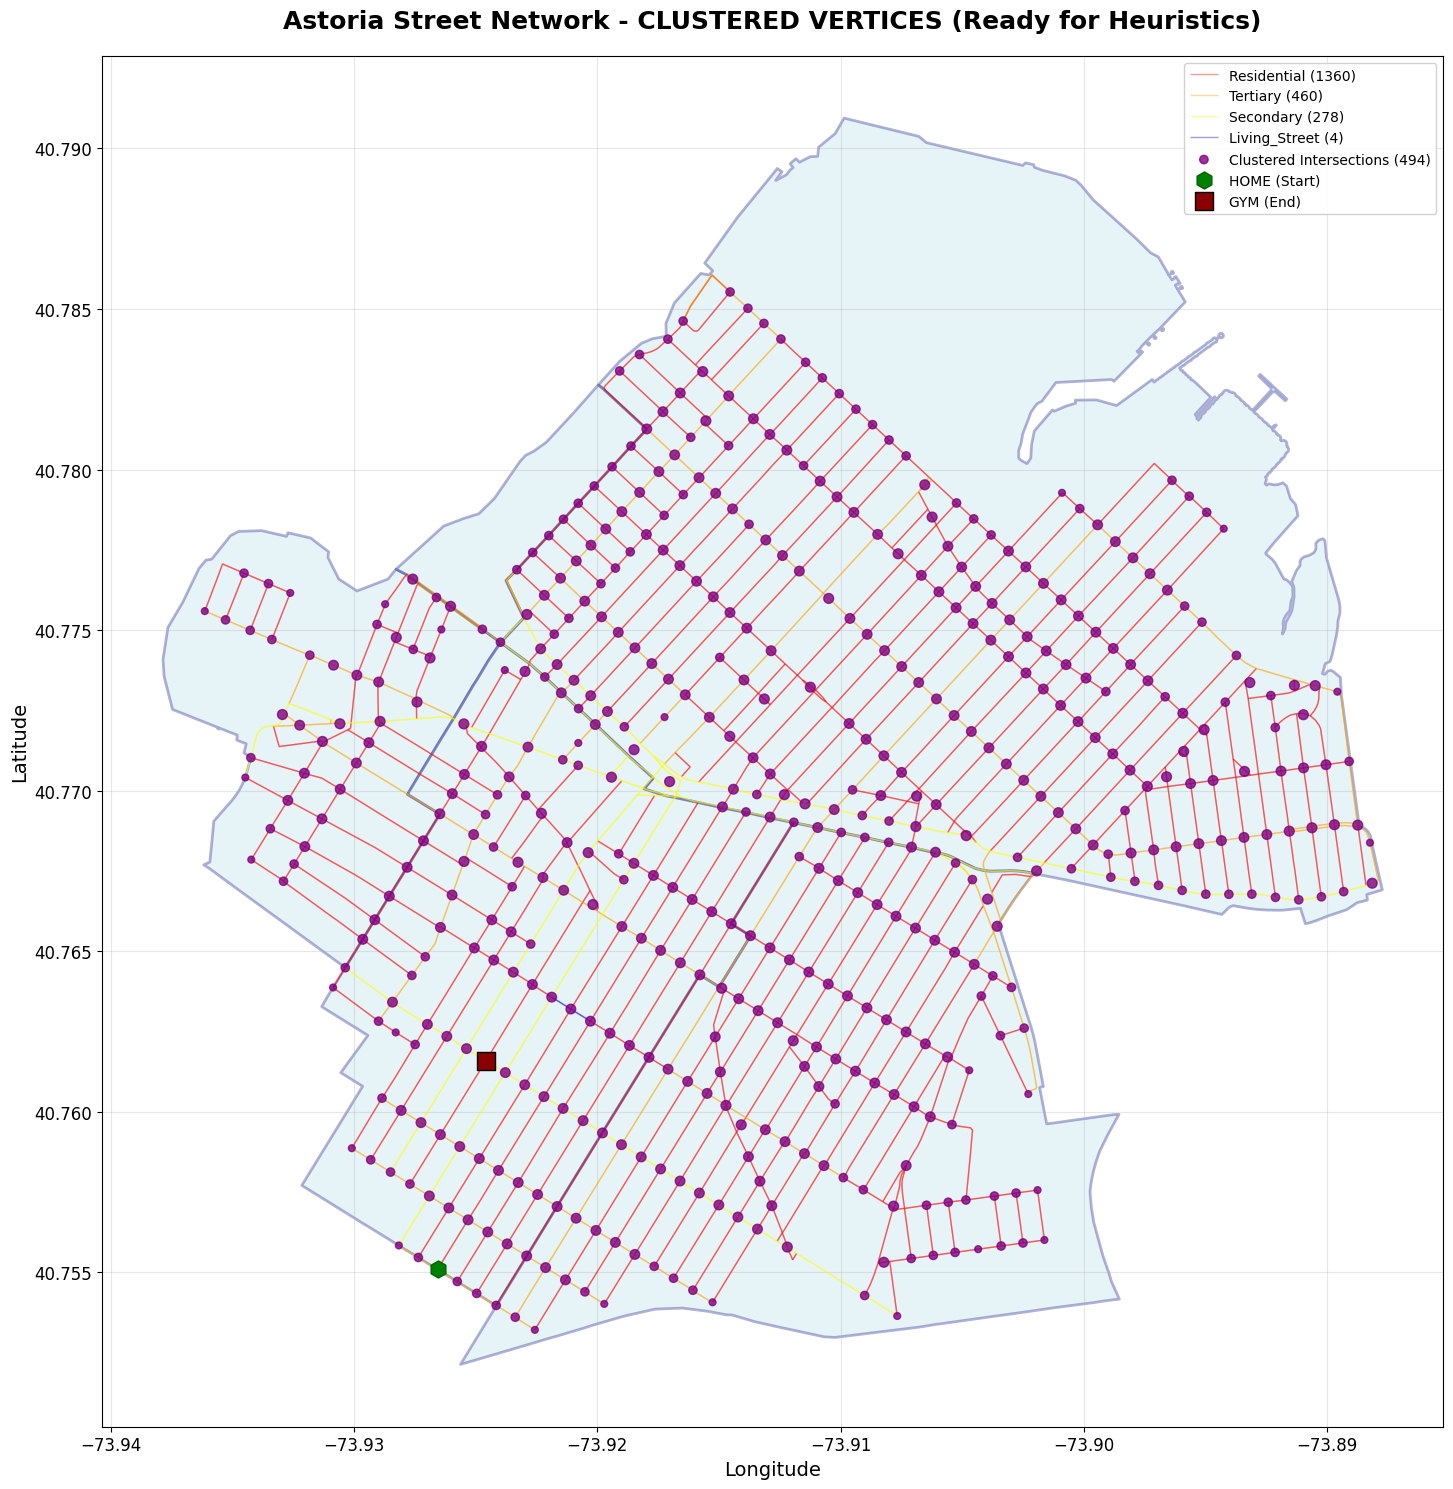


✅ Network with CLUSTERED VERTICES ready for optimization!
   • Total original vertices: 602 nodes
   • Clustered important intersections: 494 strategic points
   • Graph variable: G_final_streets
   • Home node: 42866667
   • Gym node: 42882974
   • Ready for efficient heuristic algorithm with reduced complexity!


In [27]:
# --- CLUSTER NEARBY VERTICES TO REDUCE CLUTTER ---

print("🔗 Clustering nearby vertices to reduce visual clutter...")

from sklearn.cluster import DBSCAN
import numpy as np

# Get node degrees to categorize intersections
degrees = dict(G_final_streets.degree())

# Categorize nodes by their degree (number of connections)
dead_ends = [node for node, degree in degrees.items() if degree == 1]
simple_paths = [node for node, degree in degrees.items() if degree == 2]
intersections = [node for node, degree in degrees.items() if degree >= 3]
major_intersections = [node for node, degree in degrees.items() if degree >= 4]

# Extract coordinates of all intersections and major intersections for clustering
all_important_nodes = intersections + major_intersections
if all_important_nodes:
    # Get coordinates for clustering
    coords = np.array([(G_final_streets.nodes[node]['y'], G_final_streets.nodes[node]['x']) for node in all_important_nodes])
    
    # Define clustering parameters
    cluster_radius_meters = 70  # Merge vertices within 50 meters
    meters_to_degrees = 1 / 111320  # Rough conversion
    eps = cluster_radius_meters * meters_to_degrees
    
    # Perform clustering
    clustering = DBSCAN(eps=eps, min_samples=1, algorithm='ball_tree').fit(coords)
    labels = clustering.labels_
    
    # Create clustered vertices by finding cluster centroids
    clustered_vertices = []
    unique_labels = set(labels)
    
    for label in unique_labels:
        cluster_mask = (labels == label)
        cluster_coords = coords[cluster_mask]
        cluster_nodes = [all_important_nodes[i] for i, mask in enumerate(cluster_mask) if mask]
        
        # Calculate centroid of the cluster
        centroid_lat = cluster_coords[:, 0].mean()
        centroid_lon = cluster_coords[:, 1].mean()
        
        # Calculate cluster importance (sum of degrees)
        cluster_importance = sum(G_final_streets.degree(node) for node in cluster_nodes)
        
        clustered_vertices.append({
            'lat': centroid_lat,
            'lon': centroid_lon,
            'importance': cluster_importance,
            'node_count': len(cluster_nodes),
            'nodes': cluster_nodes
        })
    
    print(f"   • Original important intersections: {len(all_important_nodes)}")
    print(f"   • Clustered into: {len(clustered_vertices)} groups")
    print(f"   • Average reduction: {(len(all_important_nodes) - len(clustered_vertices))} merged vertices")

# --- CREATE VISUALIZATION WITH CLUSTERED VERTICES ---

fig, ax = plt.subplots(figsize=(18, 15))

# Plot neighborhood boundaries first
gdf_astoria.plot(ax=ax, facecolor='lightblue', edgecolor='navy', alpha=0.3, linewidth=2)

# Plot streets by type with lighter colors (as background)
for highway_type, color in running_types_colors.items():
    type_edges = edges_final[edges_final['highway'].astype(str).str.contains(highway_type, na=False)]
    
    if not type_edges.empty:
        type_edges.plot(ax=ax, color=color, linewidth=1, alpha=0.4, label=f'{highway_type.title()} ({len(type_edges)})')

# Plot simple path nodes (very small, background)
if simple_paths:
    simple_coords = [(G_final_streets.nodes[node]['y'], G_final_streets.nodes[node]['x']) for node in simple_paths]
    simple_lats, simple_lons = zip(*simple_coords)
    ax.scatter(simple_lons, simple_lats, c='lightgray', s=1, alpha=0.3, 
               label=f'Path Nodes ({len(simple_paths)})', zorder=2)

# Plot dead ends (small red dots)
if dead_ends:
    dead_coords = [(G_final_streets.nodes[node]['y'], G_final_streets.nodes[node]['x']) for node in dead_ends]
    dead_lats, dead_lons = zip(*dead_coords)
    ax.scatter(dead_lons, dead_lats, c='red', s=6, alpha=0.7, 
               label=f'Dead Ends ({len(dead_ends)})', zorder=3)

# Plot CLUSTERED vertices with size based on importance
if all_important_nodes and clustered_vertices:
    cluster_lats = [v['lat'] for v in clustered_vertices]
    cluster_lons = [v['lon'] for v in clustered_vertices]
    cluster_sizes = [min(v['importance'] * 3, 50) for v in clustered_vertices]  # Scale size, max 50
    cluster_colors = ['purple' if v['importance'] >= 8 else 'orange' for v in clustered_vertices]
    
    ax.scatter(cluster_lons, cluster_lats, c=cluster_colors, s=cluster_sizes, alpha=0.8, 
               label=f'Clustered Intersections ({len(clustered_vertices)})', zorder=5)


home_node = ox.nearest_nodes(G_final_streets, home[1], home[0])
gym_node = ox.nearest_nodes(G_final_streets, gym[1], gym[0])

home_coords = G_final_streets.nodes[home_node]
gym_coords = G_final_streets.nodes[gym_node]

ax.scatter(home_coords['x'], home_coords['y'], c='green', s=150, marker='h', 
           label='HOME (Start)', zorder=10, edgecolors='darkgreen', linewidth=1)
ax.scatter(gym_coords['x'], gym_coords['y'], c='darkred', s=150, marker='s', 
           label='GYM (End)', zorder=10, edgecolors='black', linewidth=1)



# Styling
ax.set_title("Astoria Street Network - CLUSTERED VERTICES (Ready for Heuristics)", 
             fontsize=18, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=10, framealpha=0.9)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, alpha=0.3)
# Add neighborhood labels

plt.tight_layout()
plt.show()

print(f"\n✅ Network with CLUSTERED VERTICES ready for optimization!")
print(f"   • Total original vertices: {len(nodes_final)} nodes")
print(f"   • Clustered important intersections: {len(clustered_vertices)} strategic points")
print(f"   • Graph variable: G_final_streets")
print(f"   • Home node: {home_node}")
print(f"   • Gym node: {gym_node}")
print(f"   • Ready for efficient heuristic algorithm with reduced complexity!")

## Phase 2: Initial Solution - The Greedy Heuristic ➡️
The greddy heauristic would help us to get quick solutions to our problem. With all our vertices ready we would create different run routes that would cover all the vertices. after this, we would optimize the greedy heauristic with the ALNS method.  


In [28]:
import time
import networkx as nx
import math
import pandas as pd

# Helper function to calculate the total distance of a path
def get_path_distance(graph, path):
    """Calculates the total distance of a path in meters."""
    # This robust version handles potential MultiGraph key issues
    dist = 0
    for u, v in zip(path[:-1], path[1:]):
        # Get the first available edge between the two nodes
        edge_data = graph.get_edge_data(u, v)
        if edge_data:
            dist += list(edge_data.values())[0]['length']
    return dist


# (Your helper functions get_bearing are assumed to be defined)

def get_bearing(graph, node1, node2):
    """Calculates the compass bearing in degrees from node1 to node2."""
    try:
        y1, x1 = graph.nodes[node1]['y'], graph.nodes[node1]['x']
        y2, x2 = graph.nodes[node2]['y'], graph.nodes[node2]['x']
        lat1, lon1, lat2, lon2 = map(math.radians, [y1, x1, y2, x2])
        dLon = lon2 - lon1
        y = math.sin(dLon) * math.cos(lat2)
        x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)
        return (math.degrees(math.atan2(y, x)) + 360) % 360
    except (KeyError, ZeroDivisionError):
        return None

# --- Main Algorithm with "Corridor" Logic ---
# Setup required node variables from previous steps
home_node = ox.nearest_nodes(G_final_streets, X=home[1], Y=home[0])
gym_node = ox.nearest_nodes(G_final_streets, X=gym[1], Y=gym[0])
generated_runs = []
run_count = 0
MIN_ROUTE_DISTANCE = 6
MAX_ROUTE_DISTANCE = 10

# Use a set of tuples for efficient lookup and removal
remaining_uncovered = set((u, v) for u, v, k in G_final_streets.edges(keys=True))
print(f"Working with {len(remaining_uncovered)} uncovered street segments...")

MIN_DISTANCE_METERS = MIN_ROUTE_DISTANCE * 1609.34
start_time = time.time()

while remaining_uncovered:
    run_count += 1
    print(f"\n--- Building Run #{run_count} ---")
    
    current_path = [home_node]

    while get_path_distance(G_final_streets, current_path) < MIN_DISTANCE_METERS:
        if not remaining_uncovered:
            print("   - All streets covered.")
            break
            
        last_node = current_path[-1]
        
        # --- NEW "CORRIDOR" LOGIC ---
        continuation_found = False
        if len(current_path) > 1:
            current_bearing = get_bearing(G_final_streets, current_path[-2], last_node)
            
            # PRIORITY 1: Look for an immediate straight, uncovered neighbor
            best_neighbor = None
            min_angle_diff = 15  # Very strict tolerance for continuing straight

            for neighbor in G_final_streets.neighbors(last_node):
                # Check if the edge to the neighbor is in our to-do list
                if (last_node, neighbor) in remaining_uncovered:
                    neighbor_bearing = get_bearing(G_final_streets, last_node, neighbor)
                    angle_diff = 180 - abs(abs(current_bearing - neighbor_bearing) - 180)
                    
                    if angle_diff < min_angle_diff:
                        min_angle_diff = angle_diff
                        best_neighbor = neighbor
            
            if best_neighbor is not None:
                # If a straight path is found, TAKE IT and restart the loop
                edge_to_add = (last_node, best_neighbor)
                current_path.append(best_neighbor)
                remaining_uncovered.discard(edge_to_add)
                remaining_uncovered.discard((best_neighbor, last_node))
                continuation_found = True
                
                dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
                print(f"   - (Straight) Added edge {edge_to_add}. Dist: {dist_mi:.2f}mi.")
                continue

        # PRIORITY 2: If no straight path, find the closest new area to jump to
        if not continuation_found:
            distances = nx.single_source_dijkstra_path_length(G_final_streets, source=last_node, weight='length')
            
            best_edge = None
            min_dist = float('inf')
            
            # Find the single closest uncovered edge
            for u, v in remaining_uncovered:
                dist_to_u = distances.get(u, float('inf'))
                if dist_to_u < min_dist:
                    min_dist = dist_to_u
                    best_edge = (u, v)

            if best_edge is None:
                print("   - Warning: No reachable uncovered edges remain.")
                break

            # Path to the new corridor's start point
            path_to_new_area = nx.shortest_path(G_final_streets, source=last_node, target=best_edge[0], weight='length')
            current_path.extend(path_to_new_area[1:])
            current_path.append(best_edge[1])

            remaining_uncovered.discard(best_edge)
            remaining_uncovered.discard((best_edge[1], best_edge[0]))
            
            dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
            print(f"   - (Jump) To new edge {best_edge}. Dist: {dist_mi:.2f}mi.")

    # Complete the run by adding the path to the gym
    if current_path[-1] != gym_node:
        path_to_gym = nx.shortest_path(G_final_streets, source=current_path[-1], target=gym_node, weight='length')
        current_path.extend(path_to_gym[1:])
    
    final_dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
    generated_runs.append({'run_id': run_count, 'path': current_path, 'distance_miles': final_dist_mi})
    print(f"✅ Finished Run #{run_count}. Final distance: {final_dist_mi:.2f} miles.")

    if run_count > 50: # Safety break
        print("Stopping: Exceeded 50 runs.")
        break

# --- Summary of the Generated Plan ---
# (Your summary code here)

Working with 2094 uncovered street segments...

--- Building Run #1 ---
   - (Jump) To new edge (42866667, 42926398). Dist: 0.05mi.
   - (Straight) Added edge (42926398, 42888668). Dist: 0.10mi.
   - (Straight) Added edge (42888668, 42841773). Dist: 0.15mi.
   - (Straight) Added edge (42841773, 42917869). Dist: 0.20mi.
   - (Straight) Added edge (42917869, 42938567). Dist: 0.25mi.
   - (Jump) To new edge (42938567, 42927013). Dist: 0.37mi.
   - (Straight) Added edge (42927013, 42824167). Dist: 0.50mi.
   - (Straight) Added edge (42824167, 42882999). Dist: 0.68mi.
   - (Straight) Added edge (42882999, 42856560). Dist: 0.87mi.
   - (Straight) Added edge (42856560, 42926319). Dist: 0.99mi.
   - (Straight) Added edge (42926319, 42874069). Dist: 1.08mi.
   - (Straight) Added edge (42874069, 42833001). Dist: 1.21mi.
   - (Straight) Added edge (42833001, 42842481). Dist: 1.41mi.
   - (Straight) Added edge (42842481, 42912774). Dist: 1.50mi.
   - (Jump) To new edge (42912774, 42912776). Dist: 

In [29]:
import time
import networkx as nx
import math
import pandas as pd
import osmnx as ox

# --- Final "Lookahead" Corridor Heuristic with Quality Threshold ---

print("🏃‍♂️ Starting the Final & Most Intelligent 'Lookahead' Algorithm...")
start_time = time.time()

# --- Configuration ---
LOOKAHEAD_DISTANCE_METERS = 2000  # How far to "look ahead" down a potential path
MIN_CORRIDOR_SCORE_METERS = 500  # A corridor must offer at least this much new mileage to be considered.

# --- Setup & Helper Functions ---
# (Using the variables you provided: G_final_streets, home, gym)
home_node = ox.nearest_nodes(G_final_streets, X=home[1], Y=home[0])
gym_node = ox.nearest_nodes(G_final_streets, X=gym[1], Y=gym[0])
generated_runs = []
run_count = 0
MIN_ROUTE_DISTANCE = 6
MAX_ROUTE_DISTANCE = 10
MIN_DISTANCE_METERS = MIN_ROUTE_DISTANCE * 1609.34

remaining_uncovered = set((u, v) for u, v, k in G_final_streets.edges(keys=True))
print(f"Working with {len(remaining_uncovered)} uncovered street segments...")

def score_corridor(graph, start_node, start_bearing, uncovered_edges, path_so_far):
    """Looks ahead down a path and scores it based on NEW uncovered distance."""
    path = [start_node]
    last_node = start_node
    last_bearing = start_bearing
    score = 0
    
    temp_full_path = path_so_far + [start_node]
    
    for _ in range(15): # Look ahead a max of 15 segments
        best_neighbor, min_angle_diff = None, 25

        for neighbor in graph.neighbors(last_node):
            if len(temp_full_path) > 1 and neighbor == temp_full_path[-2]:
                continue
            
            neighbor_bearing = get_bearing(graph, last_node, neighbor)
            if neighbor_bearing is not None and last_bearing is not None:
                angle_diff = 180 - abs(abs(last_bearing - neighbor_bearing) - 180)
                if angle_diff < min_angle_diff:
                    min_angle_diff, best_neighbor = angle_diff, neighbor

        if best_neighbor:
            edge = (last_node, best_neighbor)
            if edge in uncovered_edges:
                score += graph.edges[edge + (0,)]['length']
            
            path.append(best_neighbor)
            temp_full_path.append(best_neighbor)
            last_node = best_neighbor
            last_bearing = get_bearing(graph, path[-2], path[-1])

            if get_path_distance(graph, path) > LOOKAHEAD_DISTANCE_METERS:
                break
        else:
            break
    return score

# --- Main Algorithm ---
while remaining_uncovered:
    run_count += 1
    print(f"\n--- Building Run #{run_count} ---")
    current_path = [home_node]

    while get_path_distance(G_final_streets, current_path) < MIN_DISTANCE_METERS:
        if not remaining_uncovered:
            print("   - All streets covered.")
            break
            
        last_node = current_path[-1]
        
        continuation_found = False
        if len(current_path) > 1:
            current_bearing = get_bearing(G_final_streets, current_path[-2], last_node)
            best_corridor_neighbor, best_corridor_score = None, -1
            
            for neighbor in G_final_streets.neighbors(last_node):
                if len(current_path) > 1 and neighbor == current_path[-2]: continue

                neighbor_bearing = get_bearing(G_final_streets, last_node, neighbor)
                if neighbor_bearing is not None and current_bearing is not None:
                    angle_diff = 180 - abs(abs(current_bearing - neighbor_bearing) - 180)
                    
                    if angle_diff < 45: 
                        corridor_score = score_corridor(G_final_streets, neighbor, neighbor_bearing, remaining_uncovered, current_path)
                        if corridor_score > best_corridor_score:
                            best_corridor_score = corridor_score
                            best_corridor_neighbor = neighbor
            
            # --- FINAL IMPROVEMENT: Check Corridor Quality ---
            if best_corridor_neighbor and best_corridor_score > MIN_CORRIDOR_SCORE_METERS:
                edge_to_add = (last_node, best_corridor_neighbor)
                current_path.append(best_corridor_neighbor)
                remaining_uncovered.discard(edge_to_add)
                remaining_uncovered.discard((best_corridor_neighbor, last_node))
                continuation_found = True
                dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
                print(f"   - (Corridor) Chose high-value corridor. Dist: {dist_mi:.2f}mi.")
                continue

        # PRIORITY 2: If no high-quality corridor is found, jump to the closest new area
        if not continuation_found:
            distances = nx.single_source_dijkstra_path_length(G_final_streets, source=last_node, weight='length')
            best_edge, min_dist, best_target_node = None, float('inf'), None
            
            for u, v in remaining_uncovered:
                dist_to_u = distances.get(u, float('inf'))
                dist_to_v = distances.get(v, float('inf'))
                current_min_dist = min(dist_to_u, dist_to_v)
                
                if current_min_dist < min_dist:
                    min_dist = current_min_dist
                    best_edge = (u, v)
                    best_target_node = u if dist_to_u < dist_to_v else v
            
            if best_edge is None:
                print("   - Warning: No reachable uncovered edges remain."); break

            path_to_new_area = nx.shortest_path(G_final_streets, source=last_node, target=best_target_node, weight='length')
            current_path.extend(path_to_new_area[1:])
            other_end = best_edge[1] if current_path[-1] == best_edge[0] else best_edge[0]
            current_path.append(other_end)
            remaining_uncovered.discard(best_edge)
            remaining_uncovered.discard((best_edge[1], best_edge[0]))
            dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
            print(f"   - (Jump) To new edge {best_edge}. Dist: {dist_mi:.2f}mi.")

    # Complete the run
    if current_path[-1] != gym_node:
        path_to_gym = nx.shortest_path(G_final_streets, source=current_path[-1], target=gym_node, weight='length')
        current_path.extend(path_to_gym[1:])
    
    final_dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
    generated_runs.append({'run_id': run_count, 'path': current_path, 'distance_miles': final_dist_mi})
    print(f"✅ Finished Run #{run_count}. Final distance: {final_dist_mi:.2f} miles.")

    if run_count > 50: break

# --- Summary ---
end_time = time.time()
print("\n" + "="*50)
print("Final 'Lookahead' Heuristic Plan Summary")
print("="*50)
print(f"Algorithm runtime: {end_time - start_time:.2f} seconds.")
if generated_runs:
    runs_df = pd.DataFrame(generated_runs)
    print(f"Generated a total of {len(runs_df)} runs.")
    print("\n--- Run Details ---")
    print(runs_df[['run_id', 'distance_miles']].round(2))
else:
    print("No runs were generated.")
print("="*50)

🏃‍♂️ Starting the Final & Most Intelligent 'Lookahead' Algorithm...
Working with 2094 uncovered street segments...

--- Building Run #1 ---
   - (Jump) To new edge (42866664, 42866667). Dist: 0.13mi.
   - (Corridor) Chose high-value corridor. Dist: 0.25mi.
   - (Corridor) Chose high-value corridor. Dist: 0.44mi.
   - (Corridor) Chose high-value corridor. Dist: 0.63mi.
   - (Corridor) Chose high-value corridor. Dist: 0.84mi.
   - (Corridor) Chose high-value corridor. Dist: 0.96mi.
   - (Corridor) Chose high-value corridor. Dist: 1.17mi.
   - (Corridor) Chose high-value corridor. Dist: 1.21mi.
   - (Corridor) Chose high-value corridor. Dist: 1.29mi.
   - (Corridor) Chose high-value corridor. Dist: 1.49mi.
   - (Corridor) Chose high-value corridor. Dist: 1.49mi.
   - (Corridor) Chose high-value corridor. Dist: 1.65mi.
   - (Jump) To new edge (42874622, 42866625). Dist: 1.71mi.
   - (Corridor) Chose high-value corridor. Dist: 1.76mi.
   - (Corridor) Chose high-value corridor. Dist: 1.81mi.

In [ ]:
# --- Enhanced Algorithm: Allow Street Re-running with Circuit Prevention ---

import time
import networkx as nx
import math
import pandas as pd
import osmnx as ox

print("🏃‍♂️ Starting Enhanced Algorithm: Street Re-running with Circuit Prevention...")
start_time = time.time()

# --- Configuration ---
LOOKAHEAD_DISTANCE_METERS = 2000
MIN_CORRIDOR_SCORE_METERS = 500
MIN_CIRCUIT_LENGTH = 4  # Minimum number of edges to consider a valid circuit
MIN_CIRCUIT_DISTANCE = 400  # Minimum distance (meters) for a circuit to be worthwhile

# --- Setup ---
home_node = ox.nearest_nodes(G_final_streets, X=home[1], Y=home[0])
gym_node = ox.nearest_nodes(G_final_streets, X=gym[1], Y=gym[0])
generated_runs = []
run_count = 0
MIN_ROUTE_DISTANCE = 6
MAX_ROUTE_DISTANCE = 10
MIN_DISTANCE_METERS = MIN_ROUTE_DISTANCE * 1609.34

# Track coverage: streets can be run multiple times, but we prioritize uncovered ones
street_coverage_count = {}
for u, v, k in G_final_streets.edges(keys=True):
    edge_key = tuple(sorted((u, v)))  # Normalize edge direction
    street_coverage_count[edge_key] = 0

def get_edge_priority_score(u, v):
    """Calculate priority score for an edge. Lower count = higher priority."""
    edge_key = tuple(sorted((u, v)))
    base_count = street_coverage_count.get(edge_key, 0)
    
    # Exponentially decrease priority as coverage increases
    if base_count == 0:
        return 100  # Highest priority for uncovered streets
    elif base_count == 1:
        return 50   # Medium priority for once-covered streets
    elif base_count == 2:
        return 25   # Lower priority for twice-covered streets
    else:
        return 10   # Very low priority for heavily covered streets

def is_valid_circuit(path_segment):
    """Check if a path segment forms a valid (non-trivial) circuit."""
    if len(path_segment) < MIN_CIRCUIT_LENGTH:
        return False
    
    # Check if it's actually a circuit (starts and ends at same node)
    if path_segment[0] != path_segment[-1]:
        return False
    
    # Check minimum distance requirement
    circuit_distance = get_path_distance(G_final_streets, path_segment)
    if circuit_distance < MIN_CIRCUIT_DISTANCE:
        return False
    
    return True

def detect_recent_circuit(current_path, max_lookback=6):
    """Detect if the recent path forms a small, wasteful circuit."""
    if len(current_path) < 4:
        return False
    
    # Look for the current node appearing earlier in recent path
    current_node = current_path[-1]
    lookback_length = min(max_lookback, len(current_path) - 1)
    
    for i in range(len(current_path) - 2, max(0, len(current_path) - lookback_length - 1), -1):
        if current_path[i] == current_node:
            # Found a circuit - check if it's valid
            circuit_path = current_path[i:]
            if not is_valid_circuit(circuit_path):
                return True  # Invalid circuit detected
    
    return False

def score_corridor_with_priority(graph, start_node, start_bearing, path_so_far):
    """Enhanced corridor scoring that considers coverage priority."""
    path = [start_node]
    last_node = start_node
    last_bearing = start_bearing
    score = 0
    
    temp_full_path = path_so_far + [start_node]
    
    for _ in range(15):  # Look ahead max 15 segments
        best_neighbor, min_angle_diff = None, 25
        
        for neighbor in graph.neighbors(last_node):
            if len(temp_full_path) > 1 and neighbor == temp_full_path[-2]:
                continue
            
            neighbor_bearing = get_bearing(graph, last_node, neighbor)
            if neighbor_bearing is not None and last_bearing is not None:
                angle_diff = 180 - abs(abs(last_bearing - neighbor_bearing) - 180)
                if angle_diff < min_angle_diff:
                    min_angle_diff, best_neighbor = angle_diff, neighbor
        
        if best_neighbor:
            edge_length = graph.edges[(last_node, best_neighbor, 0)]['length']
            priority_multiplier = get_edge_priority_score(last_node, best_neighbor) / 100
            score += edge_length * priority_multiplier
            
            path.append(best_neighbor)
            temp_full_path.append(best_neighbor)
            last_node = best_neighbor
            last_bearing = get_bearing(graph, path[-2], path[-1])
            
            if get_path_distance(graph, path) > LOOKAHEAD_DISTANCE_METERS:
                break
        else:
            break
    
    return score

# --- Main Algorithm ---
while any(count == 0 for count in street_coverage_count.values()) or run_count < 3:
    run_count += 1
    print(f"\n--- Building Run #{run_count} ---")
    current_path = [home_node]
    stuck_counter = 0  # Add counter to prevent infinite loops
    
    while get_path_distance(G_final_streets, current_path) < MIN_DISTANCE_METERS:
        # Check if we have any uncovered streets left
        uncovered_streets = [edge for edge, count in street_coverage_count.items() if count == 0]
        if not uncovered_streets and get_path_distance(G_final_streets, current_path) >= MIN_DISTANCE_METERS * 0.8:
            print("   - All streets covered and minimum distance nearly reached.")
            break
        
        last_node = current_path[-1]
        
        # Check for recent wasteful circuits
        if detect_recent_circuit(current_path):
            print(f"   - Detected wasteful circuit at node {last_node}, jumping to new area...")
            stuck_counter += 1
            
            # FORCE JUMP TO NEW AREA instead of continuing
            distances = nx.single_source_dijkstra_path_length(G_final_streets, source=last_node, weight='length')
            best_edge, best_score = None, -1
            
            # Find the highest priority uncovered edge
            for edge_key, coverage_count in street_coverage_count.items():
                if coverage_count == 0:  # Only consider uncovered streets
                    u, v = edge_key
                    dist_to_u = distances.get(u, float('inf'))
                    dist_to_v = distances.get(v, float('inf'))
                    min_dist = min(dist_to_u, dist_to_v)
                    
                    if min_dist < float('inf'):
                        priority_score = get_edge_priority_score(u, v)
                        distance_penalty = min_dist / 1000
                        combined_score = priority_score - distance_penalty
                        
                        if combined_score > best_score:
                            best_score = combined_score
                            best_edge = edge_key
                            best_target_node = u if dist_to_u < dist_to_v else v
            
            if best_edge:
                path_to_new_area = nx.shortest_path(G_final_streets, source=last_node, target=best_target_node, weight='length')
                current_path.extend(path_to_new_area[1:])
                other_end = best_edge[1] if current_path[-1] == best_edge[0] else best_edge[0]
                current_path.append(other_end)
                
                street_coverage_count[best_edge] += 1
                
                dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
                print(f"   - (Circuit Break) Jumped to edge {best_edge}. Dist: {dist_mi:.2f}mi.")
                stuck_counter = 0  # Reset counter
                continue
            else:
                print("   - No uncovered edges available, breaking out of loop")
                break
        
        # If we've been stuck too many times, force break
        if stuck_counter > 3:
            print(f"   - Breaking out of potential infinite loop after {stuck_counter} stuck attempts")
            break
        
        continuation_found = False
        if len(current_path) > 1:
            current_bearing = get_bearing(G_final_streets, current_path[-2], last_node)
            best_corridor_neighbor, best_corridor_score = None, -1
            
            for neighbor in G_final_streets.neighbors(last_node):
                if len(current_path) > 1 and neighbor == current_path[-2]:
                    continue
                
                neighbor_bearing = get_bearing(G_final_streets, last_node, neighbor)
                if neighbor_bearing is not None and current_bearing is not None:
                    angle_diff = 180 - abs(abs(current_bearing - neighbor_bearing) - 180)
                    
                    if angle_diff < 45:
                        corridor_score = score_corridor_with_priority(G_final_streets, neighbor, neighbor_bearing, current_path)
                        if corridor_score > best_corridor_score:
                            best_corridor_score = corridor_score
                            best_corridor_neighbor = neighbor
            
            # Accept corridor if it meets quality threshold
            if best_corridor_neighbor and best_corridor_score > MIN_CORRIDOR_SCORE_METERS:
                edge_to_add = (last_node, best_corridor_neighbor)
                current_path.append(best_corridor_neighbor)
                
                # Update coverage count
                edge_key = tuple(sorted((last_node, best_corridor_neighbor)))
                street_coverage_count[edge_key] += 1
                
                continuation_found = True
                dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
                print(f"   - (Corridor) High-value path. Dist: {dist_mi:.2f}mi.")
                stuck_counter = 0  # Reset counter
                continue
        
        # Find next best edge considering coverage priority
        if not continuation_found:
            distances = nx.single_source_dijkstra_path_length(G_final_streets, source=last_node, weight='length')
            best_edge, best_score = None, -1
            
            # Prioritize uncovered streets, then less-covered ones
            for edge_key, coverage_count in street_coverage_count.items():
                u, v = edge_key
                dist_to_u = distances.get(u, float('inf'))
                dist_to_v = distances.get(v, float('inf'))
                min_dist = min(dist_to_u, dist_to_v)
                
                if min_dist < float('inf'):
                    # Score based on coverage priority and distance
                    priority_score = get_edge_priority_score(u, v)
                    distance_penalty = min_dist / 1000  # Penalty for distant edges
                    combined_score = priority_score - distance_penalty
                    
                    if combined_score > best_score:
                        best_score = combined_score
                        best_edge = edge_key
                        best_target_node = u if dist_to_u < dist_to_v else v
            
            if best_edge:
                path_to_new_area = nx.shortest_path(G_final_streets, source=last_node, target=best_target_node, weight='length')
                current_path.extend(path_to_new_area[1:])
                other_end = best_edge[1] if current_path[-1] == best_edge[0] else best_edge[0]
                current_path.append(other_end)
                
                # Update coverage
                street_coverage_count[best_edge] += 1
                
                dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
                print(f"   - (Jump) To priority edge {best_edge}. Dist: {dist_mi:.2f}mi.")
                stuck_counter = 0  # Reset counter
            else:
                print("   - No reachable edges found, breaking out of loop")
                break
    
    # Complete the run
    if current_path[-1] != gym_node:
        try:
            path_to_gym = nx.shortest_path(G_final_streets, source=current_path[-1], target=gym_node, weight='length')
            current_path.extend(path_to_gym[1:])
        except nx.NetworkXNoPath:
            print(f"   - Warning: Cannot reach gym from {current_path[-1]}")
    
    final_dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
    generated_runs.append({'run_id': run_count, 'path': current_path, 'distance_miles': final_dist_mi})
    print(f"✅ Finished Run #{run_count}. Final distance: {final_dist_mi:.2f} miles.")
    
    if run_count > 50:  # Safety break
        break

# --- Summary ---
end_time = time.time()
print("\n" + "="*50)
print("Enhanced Algorithm Summary - Street Re-running Allowed")
print("="*50)
print(f"Algorithm runtime: {end_time - start_time:.2f} seconds.")

if generated_runs:
    runs_df = pd.DataFrame(generated_runs)
    print(f"Generated a total of {len(runs_df)} runs.")
    
    # Coverage analysis
    total_streets = len(street_coverage_count)
    uncovered_streets = sum(1 for count in street_coverage_count.values() if count == 0)
    once_covered = sum(1 for count in street_coverage_count.values() if count == 1)
    multiple_covered = sum(1 for count in street_coverage_count.values() if count > 1)
    
    print(f"\n--- Coverage Analysis ---")
    print(f"Total streets: {total_streets}")
    print(f"Uncovered streets: {uncovered_streets} ({uncovered_streets/total_streets*100:.1f}%)")
    print(f"Once-covered streets: {once_covered} ({once_covered/total_streets*100:.1f}%)")
    print(f"Multiple-covered streets: {multiple_covered} ({multiple_covered/total_streets*100:.1f}%)")
    
    print("\n--- Run Details ---")
    print(runs_df[['run_id', 'distance_miles']].round(2))
else:
    print("No runs were generated.")

print("="*50)

In [ ]:
# --- Enhanced Algorithm: Prioritize STRAIGHT Routes ---

import time
import networkx as nx
import math
import pandas as pd
import osmnx as ox

print("🏃‍♂️ Starting Enhanced Algorithm: Prioritizing STRAIGHT Routes...")
start_time = time.time()

# --- MODIFIED Configuration for STRAIGHTER routes ---
LOOKAHEAD_DISTANCE_METERS = 3000  # INCREASED: Look further ahead
MIN_CORRIDOR_SCORE_METERS = 1000  # INCREASED: Require longer straight segments
MIN_CIRCUIT_LENGTH = 6  # INCREASED: Avoid tiny loops
MIN_CIRCUIT_DISTANCE = 800  # INCREASED: Only allow substantial circuits
DEAD_END_PENALTY = 0.1  # DECREASED: More willing to use dead ends to avoid zigzag
STRAIGHT_BONUS = 3.0  # NEW: Heavy bonus for continuing straight
TURN_PENALTY = 0.2  # NEW: Heavy penalty for turns

# --- Setup ---
home_node = ox.nearest_nodes(G_final_streets, X=home[1], Y=home[0])
gym_node = ox.nearest_nodes(G_final_streets, X=gym[1], Y=gym[0])
generated_runs = []
run_count = 0
MIN_ROUTE_DISTANCE = 6
MAX_ROUTE_DISTANCE = 10
MIN_DISTANCE_METERS = MIN_ROUTE_DISTANCE * 1609.34

# Track coverage
street_coverage_count = {}
for u, v, k in G_final_streets.edges(keys=True):
    edge_key = tuple(sorted((u, v)))
    street_coverage_count[edge_key] = 0

# Analyze network connectivity
node_degrees = dict(G_final_streets.degree())
dead_end_nodes = {node for node, degree in node_degrees.items() if degree == 1}
through_street_nodes = {node for node, degree in node_degrees.items() if degree >= 3}

print(f"Network analysis: {len(dead_end_nodes)} dead ends, {len(through_street_nodes)} intersections")

def get_edge_priority_score(u, v):
    """Calculate priority score heavily favoring straight paths."""
    edge_key = tuple(sorted((u, v)))
    base_count = street_coverage_count.get(edge_key, 0)
    
    # Base priority based on coverage
    if base_count == 0:
        priority = 100
    elif base_count == 1:
        priority = 50
    elif base_count == 2:
        priority = 25
    else:
        priority = 10
    
    # LESS penalty for dead ends (we prefer straight dead ends over zigzag)
    if v in dead_end_nodes or u in dead_end_nodes:
        priority *= DEAD_END_PENALTY
        
    # Bonus for through-streets
    if v in through_street_nodes and u in through_street_nodes:
        priority *= 1.2  # Reduced bonus to not override straight preference
    
    return priority

def calculate_bearing_score(current_bearing, next_bearing):
    """Calculate how 'straight' a path continuation is."""
    if current_bearing is None or next_bearing is None:
        return 1.0
    
    # Calculate the absolute difference in bearings
    angle_diff = abs(current_bearing - next_bearing)
    angle_diff = min(angle_diff, 360 - angle_diff)  # Handle wraparound
    
    # Convert to a score where 0° difference = max score, 180° = min score
    straightness = 1.0 - (angle_diff / 180.0)
    
    # Apply exponential bonus for very straight paths
    if angle_diff <= 10:  # Very straight
        return STRAIGHT_BONUS
    elif angle_diff <= 30:  # Fairly straight
        return 1.5
    elif angle_diff <= 60:  # Moderate turn
        return 1.0
    else:  # Sharp turn
        return TURN_PENALTY

def find_straightest_route(graph, current_node, current_bearing, path_so_far, uncovered_edges):
    """Find the straightest possible continuation."""
    best_neighbor = None
    best_score = -1
    
    for neighbor in graph.neighbors(current_node):
        # Skip if we just came from this neighbor
        if len(path_so_far) > 1 and neighbor == path_so_far[-2]:
            continue
        
        # Skip recent nodes to avoid tiny loops
        if neighbor in path_so_far[-5:]:
            continue
        
        edge_key = tuple(sorted((current_node, neighbor)))
        
        # Calculate bearing to neighbor
        neighbor_bearing = get_bearing(graph, current_node, neighbor)
        
        # Calculate comprehensive score
        priority_score = get_edge_priority_score(current_node, neighbor)
        
        # MAJOR FACTOR: Bearing alignment (straightness)
        bearing_score = calculate_bearing_score(current_bearing, neighbor_bearing)
        
        # Coverage bonus for uncovered streets
        coverage_bonus = 2.0 if edge_key in uncovered_edges else 1.0
        
        # STRAIGHT paths get huge bonus
        total_score = priority_score * bearing_score * coverage_bonus
        
        if total_score > best_score:
            best_score = total_score
            best_neighbor = neighbor
    
    return best_neighbor, best_score

def score_corridor_straight_priority(graph, start_node, start_bearing, path_so_far):
    """Score corridors with heavy emphasis on straightness."""
    path = [start_node]
    last_node = start_node
    last_bearing = start_bearing
    score = 0
    
    temp_full_path = path_so_far + [start_node]
    
    for _ in range(20):  # Look ahead more segments for longer straight paths
        best_neighbor, best_neighbor_score = find_straightest_route(
            graph, last_node, last_bearing, temp_full_path, set()
        )
        
        if best_neighbor and best_neighbor_score > 0:
            edge_length = graph.edges[(last_node, best_neighbor, 0)]['length']
            
            # Heavy bonus for maintaining direction
            bearing_bonus = calculate_bearing_score(last_bearing, get_bearing(graph, last_node, best_neighbor))
            score += edge_length * bearing_bonus
            
            path.append(best_neighbor)
            temp_full_path.append(best_neighbor)
            last_node = best_neighbor
            last_bearing = get_bearing(graph, path[-2], path[-1])
            
            if get_path_distance(graph, path) > LOOKAHEAD_DISTANCE_METERS:
                break
        else:
            break
    
    return score

# --- Main Algorithm ---
while any(count == 0 for count in street_coverage_count.values()) or run_count < 3:
    run_count += 1
    print(f"\n--- Building Run #{run_count} ---")
    current_path = [home_node]
    stuck_counter = 0
    
    while get_path_distance(G_final_streets, current_path) < MIN_DISTANCE_METERS:
        uncovered_streets = [edge for edge, count in street_coverage_count.items() if count == 0]
        if not uncovered_streets and get_path_distance(G_final_streets, current_path) >= MIN_DISTANCE_METERS * 0.8:
            print("   - All streets covered and minimum distance nearly reached.")
            break
        
        last_node = current_path[-1]
        
        # Try to find the straightest continuation
        continuation_found = False
        if len(current_path) > 1:
            current_bearing = get_bearing(G_final_streets, current_path[-2], last_node)
            
            best_neighbor, best_score = find_straightest_route(
                G_final_streets, last_node, current_bearing, current_path, set(uncovered_streets)
            )
            
            # Accept if it's a decent straight continuation
            if best_neighbor and best_score > 30:  # Lower threshold to prioritize straight paths
                edge_key = tuple(sorted((last_node, best_neighbor)))
                current_path.append(best_neighbor)
                street_coverage_count[edge_key] += 1
                
                continuation_found = True
                dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
                print(f"   - (Straight) Continuing straight. Dist: {dist_mi:.2f}mi.")
                stuck_counter = 0
                continue
        
        # If no straight continuation, jump to furthest uncovered street for long straight segments
        if not continuation_found:
            distances = nx.single_source_dijkstra_path_length(G_final_streets, source=last_node, weight='length')
            best_edge, best_score = None, -1
            
            # Prioritize DISTANT uncovered streets to create longer straight segments
            for edge_key, coverage_count in street_coverage_count.items():
                if coverage_count > 0:  # Skip already covered streets unless necessary
                    continue
                    
                u, v = edge_key
                dist_to_u = distances.get(u, float('inf'))
                dist_to_v = distances.get(v, float('inf'))
                min_dist = min(dist_to_u, dist_to_v)
                
                if min_dist < float('inf'):
                    priority_score = get_edge_priority_score(u, v)
                    
                    # BONUS for distant edges (encourages longer straight runs)
                    distance_bonus = min_dist / 2000  # Bonus for being far away
                    combined_score = priority_score + distance_bonus
                    
                    if combined_score > best_score:
                        best_score = combined_score
                        best_edge = edge_key
                        best_target_node = u if dist_to_u < dist_to_v else v
            
            if best_edge:
                path_to_new_area = nx.shortest_path(G_final_streets, source=last_node, target=best_target_node, weight='length')
                current_path.extend(path_to_new_area[1:])
                other_end = best_edge[1] if current_path[-1] == best_edge[0] else best_edge[0]
                current_path.append(other_end)
                
                street_coverage_count[best_edge] += 1
                
                dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
                print(f"   - (Jump) To distant edge {best_edge}. Dist: {dist_mi:.2f}mi.")
                stuck_counter = 0
            else:
                stuck_counter += 1
                if stuck_counter > 3:
                    print("   - Breaking out of loop - no good options available")
                    break
    
    # Complete the run
    if current_path[-1] != gym_node:
        try:
            path_to_gym = nx.shortest_path(G_final_streets, source=current_path[-1], target=gym_node, weight='length')
            current_path.extend(path_to_gym[1:])
        except nx.NetworkXNoPath:
            print(f"   - Warning: Cannot reach gym from {current_path[-1]}")
    
    final_dist_mi = get_path_distance(G_final_streets, current_path) / 1609.34
    generated_runs.append({'run_id': run_count, 'path': current_path, 'distance_miles': final_dist_mi})
    print(f"✅ Finished Run #{run_count}. Final distance: {final_dist_mi:.2f} miles.")
    
    if run_count > 50:
        break

# --- Summary ---
end_time = time.time()
print("\n" + "="*50)
print("Enhanced Algorithm Summary - STRAIGHT Routes Priority")
print("="*50)
print(f"Algorithm runtime: {end_time - start_time:.2f} seconds.")

if generated_runs:
    runs_df = pd.DataFrame(generated_runs)
    print(f"Generated a total of {len(runs_df)} runs.")
    
    print("\n--- Run Details ---")
    print(runs_df[['run_id', 'distance_miles']].round(2))
else:
    print("No runs were generated.")

print("="*50)

In [ ]:
import matplotlib.pyplot as plt
import osmnx as ox

print("🎨 Generating an individual map for each of the generated routes...")

# Re-define coordinate tuples to ensure they have the correct format for plotting
home_coords = (40.755124137014725, -73.92649719348772)
gym_coords = (40.762049034238565, -73.92476009837436)

# Loop through each run in our generated plan
for run in generated_runs:
    run_id = run['run_id']
    path = run['path']
    distance = run['distance_miles']
    
    # Create a plot showing just this single route
    fig, ax = ox.plot_graph_route(
        G_final_streets,
        route=path,
        route_color='lime',
        route_linewidth=4,
        node_size=0,
        bgcolor='k',
        edge_color='#333333', # Dark gray for streets not on the path
        edge_linewidth=0.5,
        figsize=(15, 15)
    )
    
    # Add Home and Gym markers for context
    ax.scatter(home_coords[1], home_coords[0], c='green', s=250, marker='h',
               label='Home', zorder=10, edgecolors='white', linewidth=2)
    ax.scatter(gym_coords[1], gym_coords[0], c='orange', s=250, marker='s',
               label='Gym', zorder=10, edgecolors='white', linewidth=2)

    # Set a unique title for each plot
    ax.set_title(f"Path for Run #{run_id} ({distance:.2f} miles)", fontsize=20, color='white')
    
    # Display the plot for the current run
    print(f"Showing map for Run #{run_id}...")
    plt.legend()
    plt.show()

print("\n✅ All individual route maps have been displayed.")

## Phase 3: Core Optimizer - Adaptive Large Neighborhood Search (ALNS)
with this code we would optimize the greedy heauristic with the ALNS method.
how this works is that we would destroy some of the routes and then we would repair them with a better approach. This would be done iteratively until we reach the best solution possible.

In [ ]:
import networkx as nx

# --- Define Route Constraints ---
MIN_ROUTE_DISTANCE = 6.0  # miles
MAX_ROUTE_DISTANCE = 10.0 # miles

# --- Helper Functions for the Optimizer ---

def get_path_distance(graph, path):
    """Calculates the total distance of a path in meters."""
    # This robust version handles potential MultiGraph key issues
    dist = 0
    for u, v in zip(path[:-1], path[1:]):
        # Get the first available edge between the two nodes
        edge_data = graph.get_edge_data(u, v)
        if edge_data:
            dist += list(edge_data.values())[0]['length']
    return dist

def get_edges_from_path(path):
    """Converts a node path into a set of unique, directionless edges."""
    edges = set()
    for i in range(len(path) - 1):
        # Sort the nodes to make the edge directionless (A,B) is the same as (B,A)
        u, v = sorted((path[i], path[i+1]))
        edges.add((u, v))
    return edges

def calculate_solution_cost(solution):
    """
    Calculates the cost of a solution. 
    The primary cost is the number of runs, with total distance as a tie-breaker.
    """
    num_runs = len(solution)
    total_distance = sum(run['distance_miles'] for run in solution)
    # We heavily penalize solutions with more runs to prioritize consolidation.
    return (num_runs * 1000) + total_distance

def is_solution_valid(solution, all_required_edges):
    """Checks if a solution covers all required streets and meets distance constraints."""
    if not solution: return False
    covered_by_solution = set()
    for run in solution:
        # Check distance constraint
        if not (MIN_ROUTE_DISTANCE <= run['distance_miles'] <= MAX_ROUTE_DISTANCE):
            return False
        # Add edges to the covered set
        run_edges = get_edges_from_path(run['path'])
        covered_by_solution.update(run_edges)
    # Check if all required streets are covered by the final set
    return covered_by_solution == all_required_edges

print("✅ All helper functions and constants are now defined.")
print(f"   - Minimum route distance set to: {MIN_ROUTE_DISTANCE} miles")
print(f"   - Maximum route distance set to: {MAX_ROUTE_DISTANCE} miles")

In [ ]:
import time
import random
import copy
import math
import pandas as pd
import networkx as nx


# --- Configuration ---
ALNS_ITERATIONS = 2000
INITIAL_TEMPERATURE = 1.5
COOLING_RATE = 0.995
MIN_ROUTE_DISTANCE = 6.0  # miles
MAX_ROUTE_DISTANCE = 10.0 # miles
# --- Final Phase: FAST ALNS Core Optimizer ---

print("🧠 Initializing the FAST ALNS Core Optimizer...")
start_time = time.time()

# (Assuming all helper functions and constants are defined from the setup cell)

# --- "Destroy" Operator (same as before) ---
def destroy_random_routes(solution, percentage_to_remove=0.2):
    # ... (code is unchanged)
    if not solution: return [], set()
    destroyed_solution = copy.deepcopy(solution)
    num_to_remove = max(1, int(len(destroyed_solution) * percentage_to_remove))
    unassigned_edges = set()
    random.shuffle(destroyed_solution)
    for _ in range(num_to_remove):
        if not destroyed_solution: break
        route_to_remove = destroyed_solution.pop()
        unassigned_edges.update(get_edges_from_path(route_to_remove['path']))
    # print(f"   - [Destroy] Removed {num_to_remove} routes...") # Quieter for speed
    return destroyed_solution, unassigned_edges

# --- OPTIMIZED "Repair" Operator ---
def repair_smarter_insertion(solution, unassigned_edges, G, shortest_paths):
    # This version RECEIVES the pre-calculated shortest_paths dictionary
    repaired_solution = copy.deepcopy(solution)
    edges_to_place = set(unassigned_edges)

    # Stage 1: Try to insert edges into existing runs
    for edge in list(edges_to_place):
        u, v = edge
        best_insertion_cost = float('inf')
        best_insertion_info = None
        for i, run in enumerate(repaired_solution):
            path = run['path']
            for j in range(len(path) - 1):
                p1, p2 = path[j], path[j+1]
                try:
                    edge_uv_data = G.get_edge_data(u, v) or G.get_edge_data(v, u)
                    edge_p1p2_data = G.get_edge_data(p1, p2)
                    if not edge_uv_data or not edge_p1p2_data: continue
                    
                    uv_length = list(edge_uv_data.values())[0]['length']
                    p1p2_length = list(edge_p1p2_data.values())[0]['length']
                    
                    # --- SPEEDUP: Use dictionary lookups instead of recalculating ---
                    cost = (shortest_paths[p1][u] + uv_length + shortest_paths[v][p2] - p1p2_length)
                    
                    if (run['distance_miles'] * 1609.34 + cost) <= (MAX_ROUTE_DISTANCE * 1609.34):
                        if cost < best_insertion_cost:
                            best_insertion_cost = cost
                            best_insertion_info = (i, j, u, v)
                except KeyError: # Happens if a node isn't in the shortest_paths dict (disconnected)
                    continue

        if best_insertion_info:
            run_idx, pos_idx, insert_u, insert_v = best_insertion_info
            # This is still needed to reconstruct the path, but it's called far less often
            path_to_u = nx.shortest_path(G, repaired_solution[run_idx]['path'][pos_idx], insert_u, weight='length')
            path_from_v = nx.shortest_path(G, insert_v, repaired_solution[run_idx]['path'][pos_idx+1], weight='length')
            original_path = repaired_solution[run_idx]['path']
            new_path = original_path[:pos_idx+1] + path_to_u[1:] + path_from_v[1:]
            repaired_solution[run_idx]['path'] = new_path
            repaired_solution[run_idx]['distance_miles'] += best_insertion_cost / 1609.34
            edges_to_place.remove(edge)

    # Stage 2: Build new, valid routes from any leftover edges
    while edges_to_place:
        new_run_path = [home_node]
        while get_path_distance(G, new_run_path) < (MIN_ROUTE_DISTANCE * 1609.34) and edges_to_place:
            last_node = new_run_path[-1]
            closest_edge, min_dist = None, float('inf')
            
            # --- SPEEDUP: Use dictionary lookups ---
            distances_from_last_node = shortest_paths[last_node]
            for edge in edges_to_place:
                dist_to_edge = distances_from_last_node.get(edge[0], float('inf'))
                if dist_to_edge < min_dist:
                    min_dist = dist_to_edge
                    closest_edge = edge
            
            if closest_edge:
                path_to_edge = nx.shortest_path(G, last_node, closest_edge[0], weight='length')
                new_run_path.extend(path_to_edge[1:])
                new_run_path.append(closest_edge[1])
                edges_to_place.discard(closest_edge)
                edges_to_place.discard((closest_edge[1], closest_edge[0]))
            else: break
        
        path_to_gym = nx.shortest_path(G, new_run_path[-1], gym_node, weight='length')
        new_run_path.extend(path_to_gym[1:])
        new_dist_miles = get_path_distance(G, new_run_path) / 1609.34
        repaired_solution.append({'run_id': -1, 'path': new_run_path, 'distance_miles': new_dist_miles})
        
    # print(f"   - [Repair] Smart repair complete...") # Quieter for speed
    return repaired_solution

# --- ALNS Main Loop ---

# --- SPEEDUP: Pre-calculate all shortest path distances ONCE ---
print("⏳ Pre-calculating all-pairs shortest paths... (This may take a minute)")
all_pairs_shortest_paths = dict(nx.all_pairs_dijkstra_path_length(G_final_streets, weight='length'))
print("✅ Pre-calculation complete.")

initial_solution = generated_runs
all_required_edges = set(tuple(sorted((u, v))) for u, v, k in G_final_streets.edges(keys=True))
current_solution = copy.deepcopy(initial_solution)
best_solution = copy.deepcopy(initial_solution)
temperature = INITIAL_TEMPERATURE

print(f"\n🚀 Starting FAST ALNS optimization for {ALNS_ITERATIONS} iterations...")
print(f"Initial Solution: {len(best_solution)} runs, Cost: {calculate_solution_cost(best_solution):.2f}")

for i in range(ALNS_ITERATIONS):
    temp_solution = copy.deepcopy(current_solution)
    destroyed_solution, unassigned_edges = destroy_random_routes(temp_solution, percentage_to_remove=0.2)
    # Pass the pre-calculated paths to the repair function
    new_solution = repair_smarter_insertion(destroyed_solution, unassigned_edges, G_final_streets, all_pairs_shortest_paths)
    new_solution = [r for r in new_solution if MIN_ROUTE_DISTANCE <= r['distance_miles'] <= MAX_ROUTE_DISTANCE]
    
    if is_solution_valid(new_solution, all_required_edges):
        current_cost = calculate_solution_cost(current_solution)
        new_cost = calculate_solution_cost(new_solution)
        
        if new_cost < calculate_solution_cost(best_solution):
            best_solution = copy.deepcopy(new_solution)
            current_solution = copy.deepcopy(new_solution)
            print(f"🎉 Iteration {i+1}/{ALNS_ITERATIONS}: New BEST solution found! Runs: {len(best_solution)}, Cost: {new_cost:.2f}")
        elif new_cost < current_cost:
            current_solution = copy.deepcopy(new_solution)
        elif temperature > 0 and math.exp((current_cost - new_cost) / temperature) > random.random():
            current_solution = copy.deepcopy(new_solution)
            
    temperature *= COOLING_RATE
    
    if (i + 1) % 100 == 0:
        print(f"   -> Progress: {i+1}/{ALNS_ITERATIONS} | Current best: {len(best_solution)} runs | Temp: {temperature:.2f}")

# --- Final Summary ---
# (Same summary code)

In [ ]:
import matplotlib.pyplot as plt
import osmnx as ox

print("🎨 Generating an individual map for each of the optimized routes...")

# Use the 'best_solution' from the ALNS algorithm
final_runs = best_solution 

# Re-define coordinate tuples to ensure they have the correct format for plotting
home_coords = (40.755124137014725, -73.92649719348772)
gym_coords = (40.762049034238565, -73.92476009837436)

# Loop through each run in our final plan
for run in final_runs:
    run_id = run['run_id']
    path = run['path']
    distance = run['distance_miles']
    
    # Create a plot showing just this single route
    fig, ax = ox.plot_graph_route(
        G_final_streets,
        route=path,
        route_color='lime',
        route_linewidth=4,
        node_size=0,
        bgcolor='k',
        edge_color='#333333', # Dark gray for streets not on the path
        edge_linewidth=0.5,
        figsize=(15, 15)
    )
    
    # Add Home and Gym markers for context
    ax.scatter(home_coords[1], home_coords[0], c='green', s=250, marker='h',
               label='Home', zorder=10, edgecolors='white', linewidth=2)
    ax.scatter(gym_coords[1], gym_coords[0], c='orange', s=250, marker='s',
               label='Gym', zorder=10, edgecolors='white', linewidth=2)

    # Set a unique title for each plot
    ax.set_title(f"Optimized Path for Run #{run_id} ({distance:.2f} miles)", fontsize=20, color='white')
    
    # Display the plot for the current run
    print(f"Showing map for Optimized Run #{run_id}...")
    plt.legend()
    plt.show()

print("\n✅ All individual optimized route maps have been displayed.")

In [ ]:
%pip install gpxpy


In [ ]:
import gpxpy
import gpxpy.gpx
import os

# --- Phase 13: Export Final Routes to GPX Files ---

print("💾 Exporting optimized routes to GPX files...")

# Create a directory to store the GPX files if it doesn't exist
output_dir = "astoria_running_routes"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Use the 'best_solution' from the ALNS algorithm
final_runs = best_solution 

# Loop through each optimized run to create a GPX file
for run in final_runs:
    run_id = run['run_id']
    path = run['path']
    
    # Create a new GPX object
    gpx = gpxpy.gpx.GPX()

    # Create a new track in our GPX file
    gpx_track = gpxpy.gpx.GPXTrack()
    gpx.tracks.append(gpx_track)

    # Create a new segment in our track
    gpx_segment = gpxpy.gpx.GPXTrackSegment()
    gpx_track.segments.append(gpx_segment)

    # Add each point from our route path to the GPX segment
    for node_id in path:
        node = G_final_streets.nodes[node_id]
        gpx_segment.points.append(gpxpy.gpx.GPXTrackPoint(latitude=node['y'], longitude=node['x']))
        
    # Define the filename
    file_name = f"Astoria_Run_{run_id}.gpx"
    file_path = os.path.join(output_dir, file_name)
    
    # Save the GPX file
    with open(file_path, 'w') as f:
        f.write(gpx.to_xml())
        
    print(f"   -> Successfully saved: {file_name}")

print(f"\n✅ All {len(final_runs)} routes have been exported to the '{output_dir}' folder.")

## Level of optimization

In [ ]:
# --- Phase 12: Analyze the Level of Optimization ---

print("📊 Analyzing and reporting the level of optimization...")

# First, we need the total unique street miles to cover
total_miles_to_cover = sum(data['length'] for u, v, data in G_final_streets.edges(data=True)) / 1609.34

# --- Analyze the Initial Solution ---
initial_runs_count = len(initial_solution)
initial_total_distance = sum(r['distance_miles'] for r in initial_solution)
initial_deadheading = initial_total_distance - total_miles_to_cover
initial_deadhead_pct = (initial_deadheading / initial_total_distance) * 100 if initial_total_distance > 0 else 0
initial_violations = sum(1 for r in initial_solution if not (MIN_ROUTE_DISTANCE <= r['distance_miles'] <= MAX_ROUTE_DISTANCE))

# --- Analyze the Final (Best) Solution ---
final_runs_count = len(best_solution)
final_total_distance = sum(r['distance_miles'] for r in best_solution)
final_deadheading = final_total_distance - total_miles_to_cover
final_deadhead_pct = (final_deadheading / final_total_distance) * 100 if final_total_distance > 0 else 0
final_violations = sum(1 for r in best_solution if not (MIN_ROUTE_DISTANCE <= r['distance_miles'] <= MAX_ROUTE_DISTANCE))

# --- Print the Report ---
print("\n" + "="*60)
print("              OPTIMIZATION PERFORMANCE REPORT")
print("="*60)
print(f"{'Metric':<25} | {'Initial Plan':<15} | {'Final Plan':<15}")
print("-"*60)
print(f"{'Number of Runs':<25} | {initial_runs_count:<15} | {final_runs_count:<15}")
print(f"{'Total Distance Run (mi)':<25} | {initial_total_distance:<15.2f} | {final_total_distance:<15.2f}")
print(f"{'Unique Street Miles (mi)':<25} | {total_miles_to_cover:<15.2f} | {total_miles_to_cover:<15.2f}")
print(f"{'Deadheading Miles (mi)':<25} | {initial_deadheading:<15.2f} | {final_deadheading:<15.2f}")
print(f"{'Deadheading Percentage':<25} | {f'{initial_deadhead_pct:.1f}%':<15} | {f'{final_deadhead_pct:.1f}%':<15}")
print(f"{'Distance Violations':<25} | {initial_violations:<15} | {final_violations:<15}")
print("="*60)

# Summary of improvements
runs_reduced = initial_runs_count - final_runs_count
deadheading_reduced = initial_deadheading - final_deadheading
if runs_reduced > 0:
    print(f"\n✅ Improvement: Reduced the plan by {runs_reduced} run(s)!")
if deadheading_reduced > 0:
    print(f"✅ Improvement: Eliminated {deadheading_reduced:.2f} miles of wasted running!")
if final_violations == 0 and initial_violations > 0:
    print("✅ Improvement: Fixed all distance constraint violations!")

In [ ]:
# Extract the 'type' and 'coordinates' fields from the 'the_geom' column
df['geometry_type'] = df['the_geom'].apply(lambda x: x['type'] if isinstance(x, dict) else None)
df['geometry_coordinates'] = df['the_geom'].apply(lambda x: x['coordinates'] if isinstance(x, dict) else None)

# Validate the extracted data
print("Geometry Type Column:")
print(df['geometry_type'].head())

print("\nGeometry Coordinates Column:")
print(df['geometry_coordinates'].head())